In [1]:
# instalação e importação das bibliotecas
import pandas as pd
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA
from statsmodels.tsa.stattools import adfuller
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsforecast import StatsForecast
from statsforecast.models import SeasonalNaive, AutoARIMA
from statsmodels.tsa.stattools import adfuller


c:\Users\rpjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
# acesso a base e tratamento das colunas
df = pd.read_csv('https://raw.githubusercontent.com/Rogeriom49/4DTAT/main/techChallange2/datasets/Ibovespa14anos.csv',parse_dates=[0],dayfirst=True)
print(df.info())

df.rename(columns={'Último':'y','Data':'ds'},inplace=True)
df = df.drop(columns=['Mínima','Máxima','Var%','Abertura','Vol.'])
df['unique_id']='IBOV'
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3566 entries, 0 to 3565
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Data      3566 non-null   datetime64[ns]
 1   Último    3566 non-null   float64       
 2   Abertura  3566 non-null   float64       
 3   Máxima    3566 non-null   float64       
 4   Mínima    3566 non-null   float64       
 5   Vol.      3565 non-null   object        
 6   Var%      3566 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 195.1+ KB
None
          ds        y unique_id
0 2024-05-24  124.306      IBOV
1 2024-05-23  124.729      IBOV
2 2024-05-22  125.650      IBOV
3 2024-05-21  127.412      IBOV
4 2024-05-20  127.751      IBOV


In [3]:
#definição de treino e teste da base
treino = df.loc[(df['ds'] >= '2023-01-01') & (df['ds'] < '2024-01-01')]
valid = df.loc[(df['ds'] >= '2024-01-01') & (df['ds'] < '2024-05-12')]
h = valid['ds'].nunique()
print(h)

90


In [4]:
#função para calculo do wmape
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

c:\Users\rpjun\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:485: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


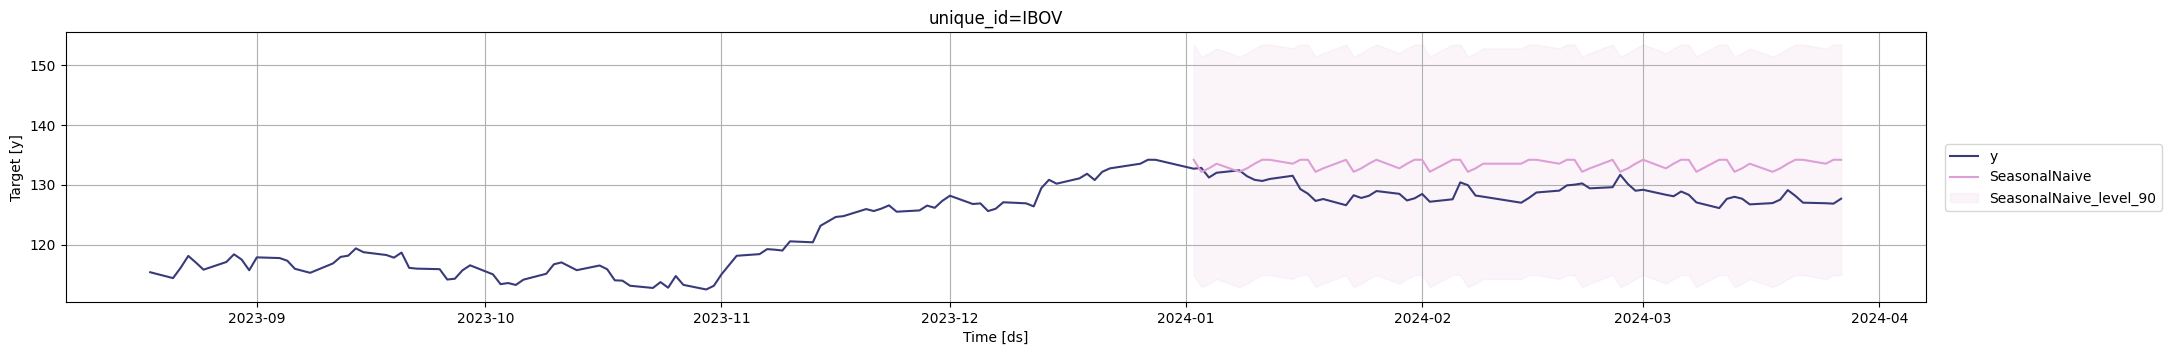

In [5]:
#utilização do modelo Seazonalnaive
model = StatsForecast(models=[SeasonalNaive(season_length=5)], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df = model.predict(h=h, level=[90])
forecast_df = forecast_df.reset_index().merge(valid, on=['ds','unique_id'], how='left')
forecast_df=forecast_df.dropna()

model.plot(treino, forecast_df, level=[90],unique_ids=['IBOV'],engine ='matplotlib', max_insample_length=90)


In [6]:
#calculo do resultado do modelo
wmape1 = wmape(forecast_df['y'].values, forecast_df['SeasonalNaive'].values)
print(f"WMAPE: {wmape1:.2%}")

WMAPE: 3.56%
